# Setup and resources

## imports

In [2]:
# imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys

from dreem_tools import plotting, parse, dataframe


# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

## paths

In [3]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(BASE_DIR)

ANALYSIS_DIR = os.path.join(BASE_DIR, 'scripts', 'analysis')
sys.path.append(ANALYSIS_DIR)

DATA_PATH = BASE_DIR + '/data'

## load data

In [4]:
df_mg_titra = pd.read_json(f"{DATA_PATH}/wt_mg_titra.json")
df_buff = pd.read_json(f"{DATA_PATH}/wt_buffer_titra.json")
df_uucg = pd.read_json(f"{DATA_PATH}/uucg_mg_titra.json")
df_notlr = pd.read_json(f"{DATA_PATH}/no_tlr_mg.json")

## style functions

In [5]:
# style functions
def publication_style_ax(ax):
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)
    fsize = 24
    ax.xaxis.label.set_fontsize(fsize)
    ax.yaxis.label.set_fontsize(fsize)
    ax.tick_params(axis='both', which='major', labelsize=fsize-2)


def publication_scatter(ax, x, y, **kwargs):
    ax.scatter(x, y, s=150, **kwargs)

def publication_line_w_markers(ax, x, y, **kwargs):
    ax.plot(x, y, lw=3, marker='o', markersize=10, **kwargs)


## plotting functions

In [6]:
def plot_pop_avg_traces_all(df, plot_sequence=False, ylim=None, **kwargs):
    fig, ax = plt.subplots(1, 1, **kwargs)
    for i, row in df.iterrows():
        if "label" in row:
            label = row["label"]
        else:
            label = row["rna_name"]
        plt.plot(row["data"], label=label, lw=4)
    #fig.legend(loc="upper left")
    if plot_sequence:
        seq = df.iloc[0]["sequence"]
        ss = df.iloc[0]["structure"]
        x = list(range(len(seq)))
        ax.set_xticks(x)
        ax.set_xticklabels([f"{s}\n{nt}" for s, nt in zip(seq, ss)])
    if ylim is not None:
        ax.set_ylim([0, ylim])
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)


# Plots

## buffer comparisons

### 0 and 40 mM Mg2+ with 300 mM NaCoc

In [7]:
row1 = df_mg_titra[(df_mg_titra.buffer == 'NaCoc') & (df_mg_titra.mg_conc == 40) & (df_mg_titra.buffer_conc == 300)].iloc[0]
row2 = df_mg_titra[(df_mg_titra.buffer == 'NaCoc') & (df_mg_titra.mg_conc == 0) & (df_mg_titra.buffer_conc == 300)].iloc[0]

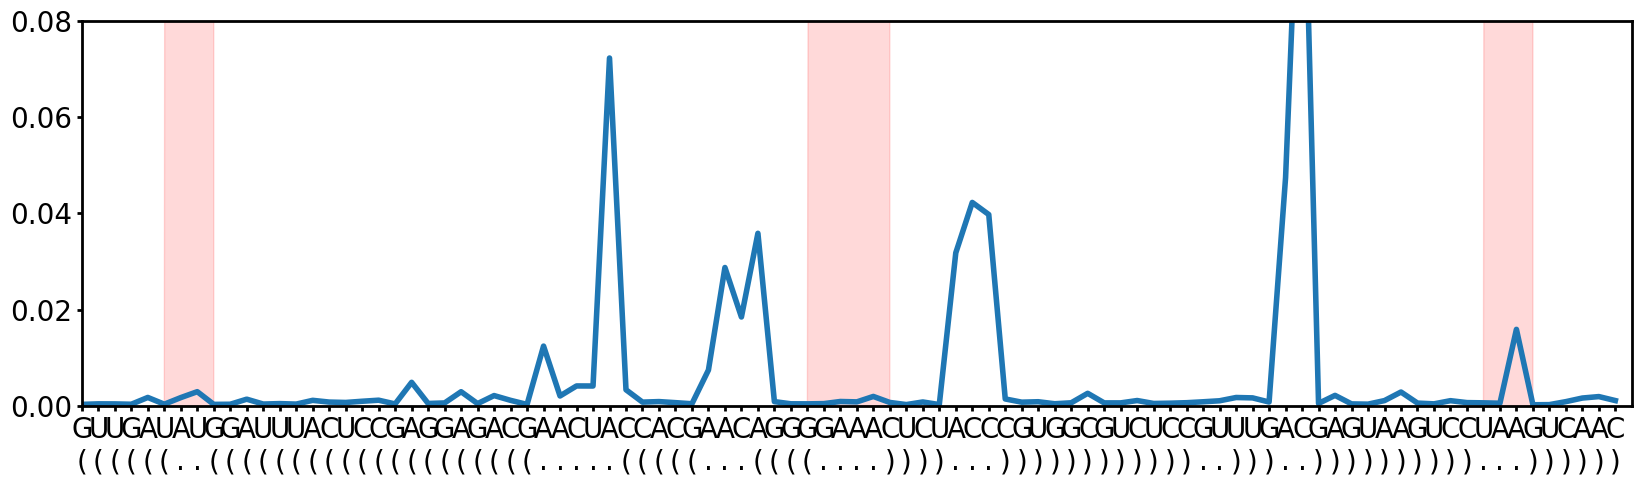

In [8]:
df_sub_1 = pd.DataFrame([row1])
df_sub_1 = dataframe.trim(df_sub_1, 20, 22)
df_sub_1["label"] = ["40 mM Mg2+"]
plot_pop_avg_traces_all(df_sub_1, plot_sequence=True, ylim=0.08, figsize=(20, 5));
plt.xlim([0, len(df_sub_1.iloc[0]["sequence"])])
x = range(0, len(df_sub_1.iloc[0]["sequence"]))
plt.fill_between([5, 8], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([44, 49], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([85, 88], [0, 10], color='red', alpha=0.15, zorder=-1)

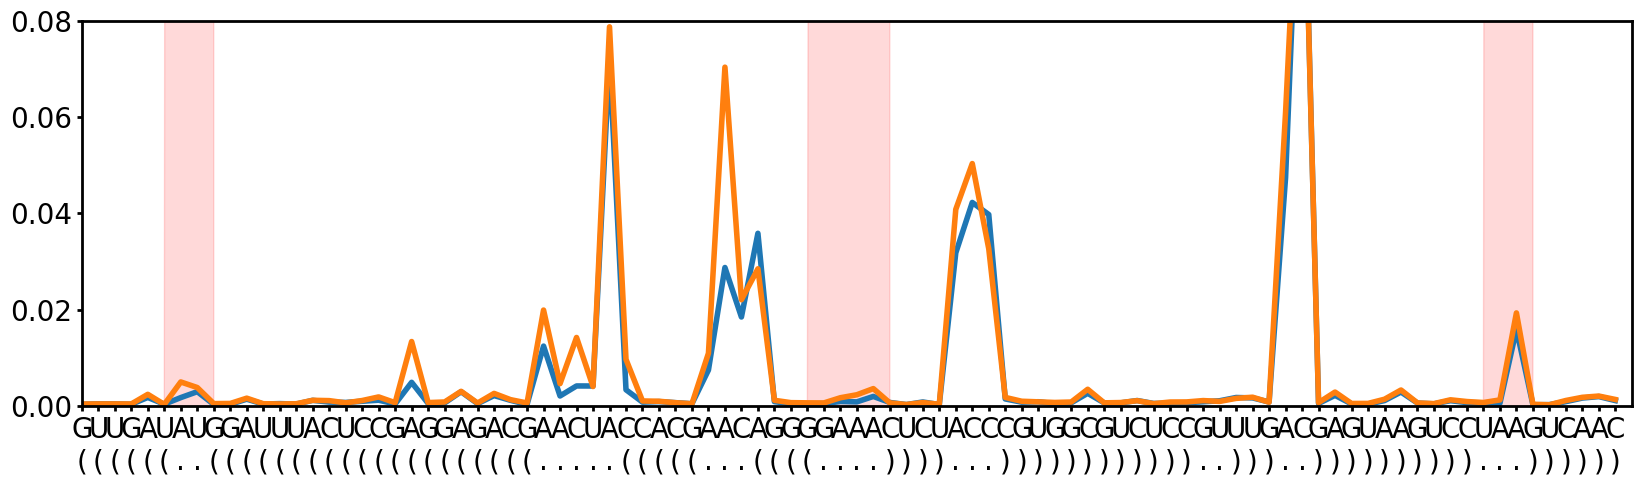

In [9]:
df_sub_1 = pd.DataFrame([row1, row2])
df_sub_1 = dataframe.trim(df_sub_1, 20, 22)
df_sub_1["label"] = ["40 mM Mg2+", "0 mM Mg2+"]
plot_pop_avg_traces_all(df_sub_1, plot_sequence=True, ylim=0.08, figsize=(20, 5));
plt.xlim([0, len(df_sub_1.iloc[0]["sequence"])])
x = range(0, len(df_sub_1.iloc[0]["sequence"]))
plt.fill_between([5, 8], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([44, 49], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([85, 88], [0, 10], color='red', alpha=0.15, zorder=-1)

### different buffers at 40 mM Mg2+

In [10]:
row1 = df_buff[(df_buff.buffer == 'NaCoc') & (df_buff.mg_conc == 10) & (df_buff.buffer_conc == 300)].iloc[0]
row2 = df_buff[(df_buff.buffer == 'Hepes') & (df_buff.mg_conc == 10) & (df_buff.buffer_conc == 300)].iloc[0]
row3 = df_buff[(df_buff.buffer == 'Tris') & (df_buff.mg_conc == 10) & (df_buff.buffer_conc == 300)].iloc[0]
row4 = df_buff[(df_buff.buffer == 'KCl') & (df_buff.mg_conc == 10) & (df_buff.buffer_conc == 300)].iloc[0]


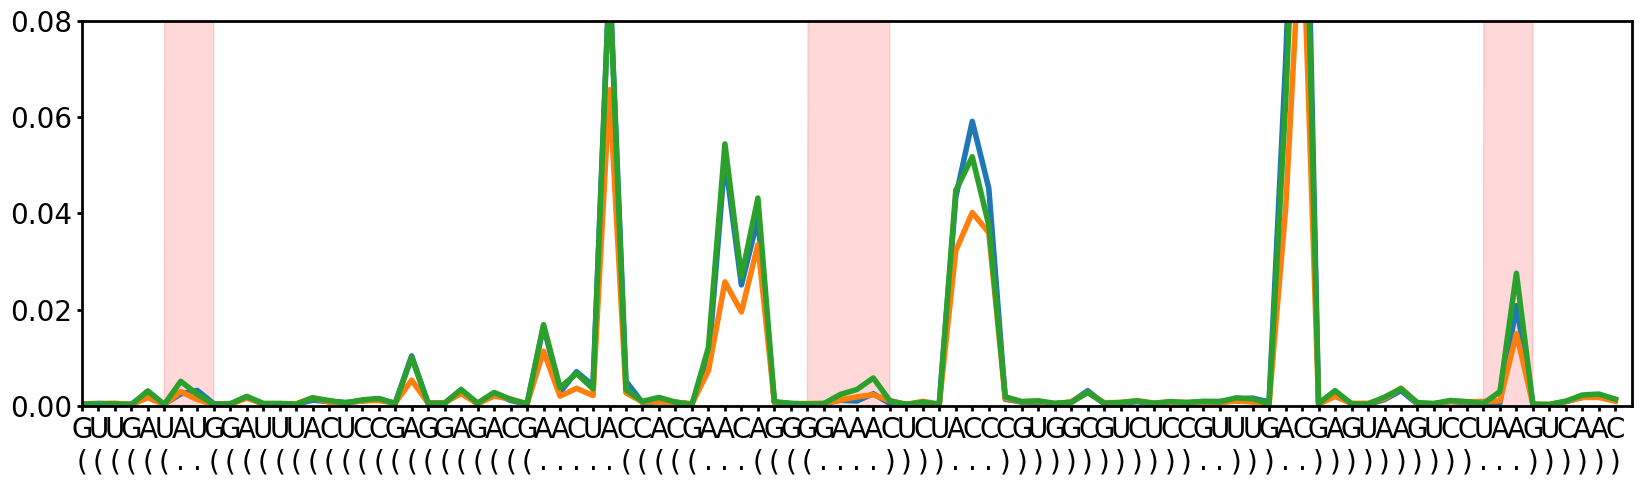

In [11]:
df_sub_1 = pd.DataFrame([row1, row2, row3])
df_sub_1 = dataframe.trim(df_sub_1, 20, 22)
df_sub_1["label"] = ["NaCoc", "Hepes", "Tris"]
plot_pop_avg_traces_all(df_sub_1, plot_sequence=True, ylim=0.08, figsize=(20, 5));
plt.xlim([0, len(df_sub_1.iloc[0]["sequence"])])
x = range(0, len(df_sub_1.iloc[0]["sequence"]))
plt.fill_between([5, 8], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([44, 49], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([85, 88], [0, 10], color='red', alpha=0.15, zorder=-1)

### diff between 300 mM NaCoc and 50 mM Hepes

In [12]:
row1 = df_buff[(df_buff.buffer == 'NaCoc') & (df_buff.mg_conc == 10) & (df_buff.buffer_conc == 300)].iloc[0]
row2 = df_buff[(df_buff.buffer == 'Hepes') & (df_buff.mg_conc == 10) & (df_buff.buffer_conc == 50)].iloc[0]

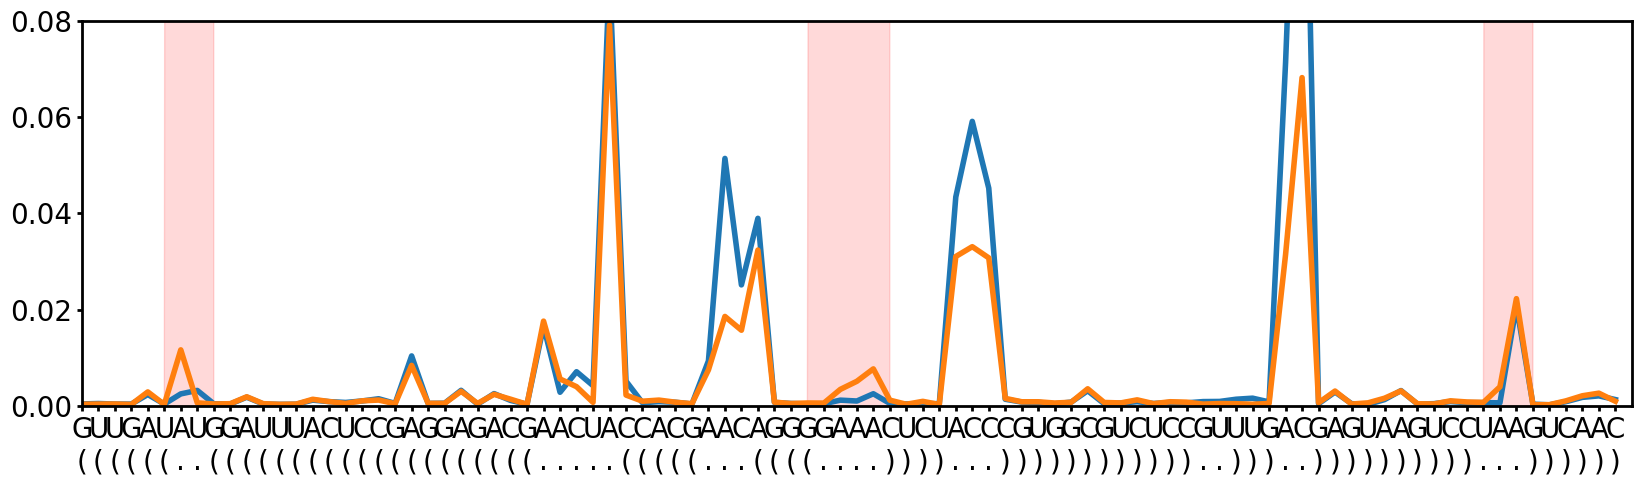

In [13]:
df_sub_1 = pd.DataFrame([row1, row2])
df_sub_1 = dataframe.trim(df_sub_1, 20, 22)
df_sub_1["label"] = ["NaCoc", "Hepes"]
plot_pop_avg_traces_all(df_sub_1, plot_sequence=True, ylim=0.08, figsize=(20, 5));
plt.xlim([0, len(df_sub_1.iloc[0]["sequence"])])
x = range(0, len(df_sub_1.iloc[0]["sequence"]))
plt.fill_between([5, 8], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([44, 49], [0, 10], color='red', alpha=0.15, zorder=-1)
plt.fill_between([85, 88], [0, 10], color='red', alpha=0.15, zorder=-1)

## mg2+ titrations

### GAAA tetraloop

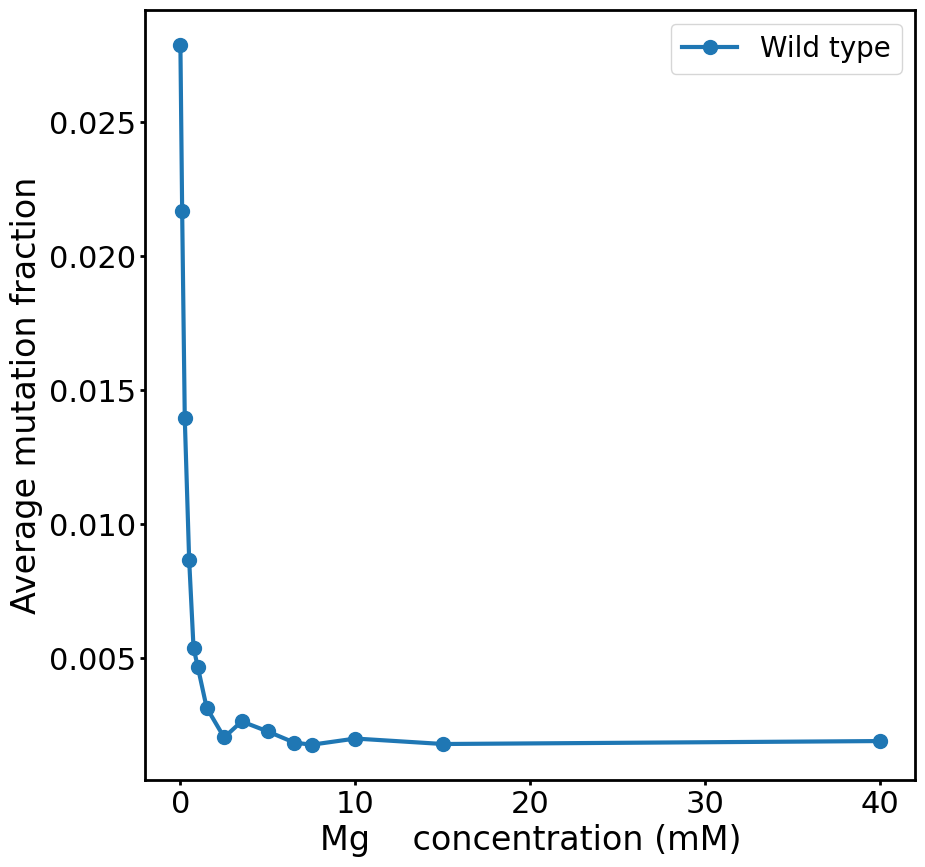

In [14]:
fig, ax = plt.subplots()
df_sub = df_mg_titra[df_mg_titra["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"]
publication_line_w_markers(ax, df_sub['mg_conc'], df_sub['gaaa_avg'], label='Wild type')
publication_style_ax(ax)
ax.set_ylabel("Average mutation fraction")
ax.set_xlabel("Mg    concentration (mM)")
ax.set_box_aspect(1)
ax.legend()

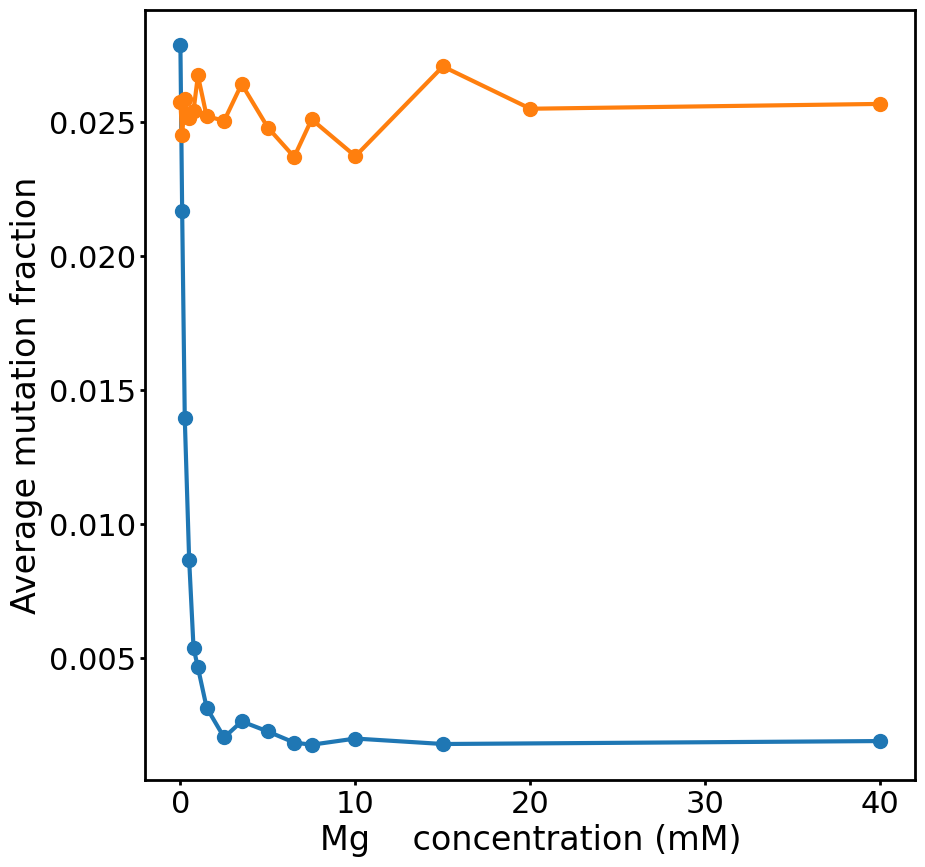

In [15]:
fig, ax = plt.subplots()
df_sub = df_mg_titra[df_mg_titra["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"]
publication_line_w_markers(ax, df_sub['mg_conc'], df_sub['gaaa_avg'], label='Wild type')
publication_line_w_markers(ax, df_notlr['mg_conc'], df_notlr['gaaa_avg'], label='No tetraloop-receptor')
publication_style_ax(ax)
ax.set_ylabel("Average mutation fraction")
ax.set_xlabel("Mg    concentration (mM)")
ax.set_box_aspect(1)
#ax.legend()

### TLR A4

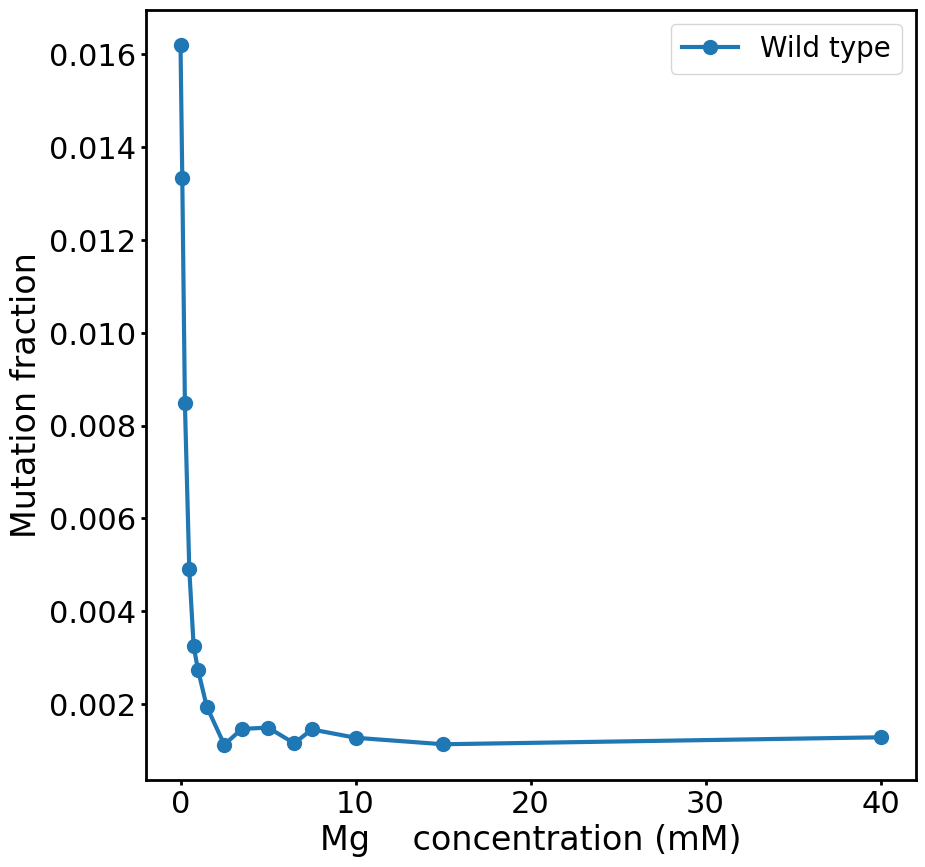

In [16]:
POS = 4
fig, ax = plt.subplots()
publication_line_w_markers(ax, df_sub['mg_conc'], df_sub['tlr'].apply(lambda x : x[POS-1]), label='Wild type')
publication_style_ax(ax)
ax.set_ylabel("Mutation fraction")
ax.set_xlabel("Mg    concentration (mM)")
ax.set_box_aspect(1)
ax.legend()

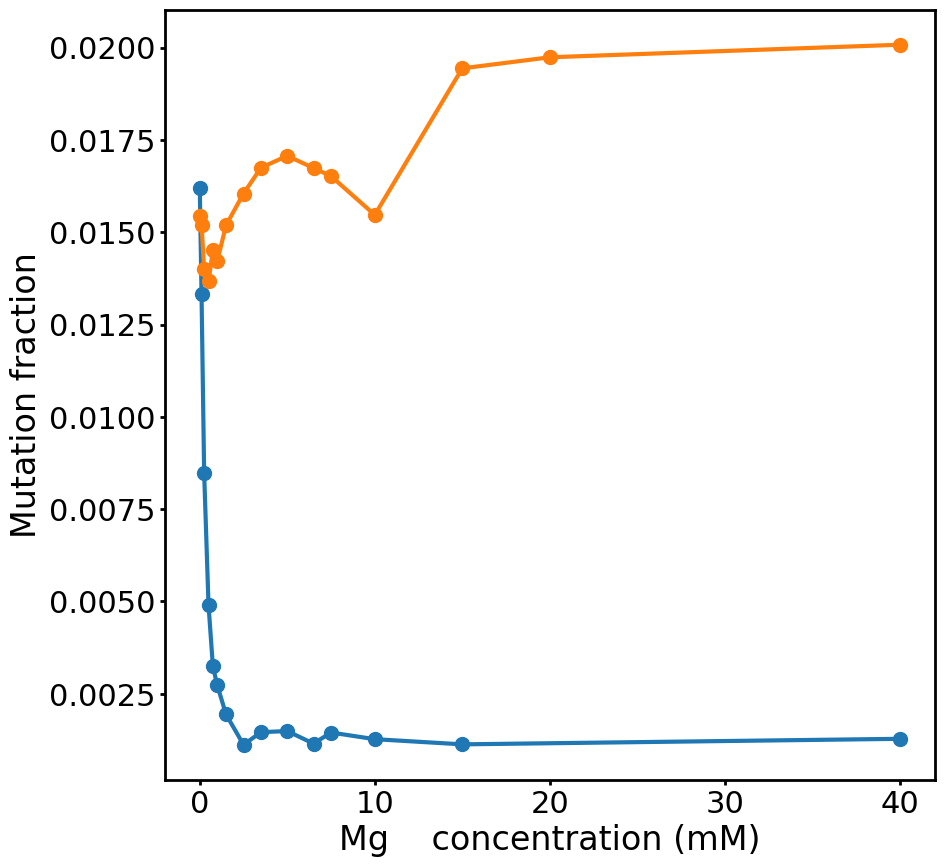

In [17]:
POS = 4
fig, ax = plt.subplots()
publication_line_w_markers(ax, df_sub['mg_conc'], df_sub['tlr'].apply(lambda x : x[POS-1]), label='Wild type')
publication_line_w_markers(ax, df_uucg['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), label='UUCG mutation')
publication_style_ax(ax)
ax.set_ylabel("Mutation fraction")
ax.set_xlabel("Mg    concentration (mM)")
ax.set_box_aspect(1)


### TLR A8

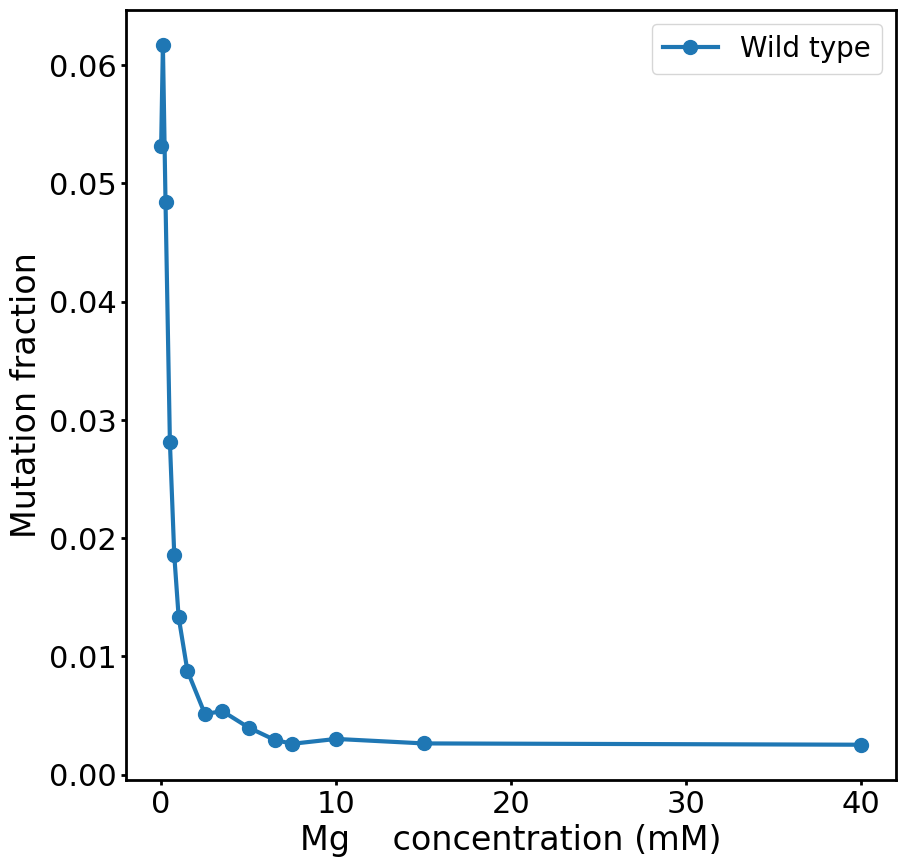

In [18]:
POS = 8
fig, ax = plt.subplots()
publication_line_w_markers(ax, df_sub['mg_conc'], df_sub['tlr'].apply(lambda x : x[POS-1]), label='Wild type')
publication_style_ax(ax)
ax.set_ylabel("Mutation fraction")
ax.set_xlabel("Mg    concentration (mM)")
ax.set_box_aspect(1)
ax.legend()

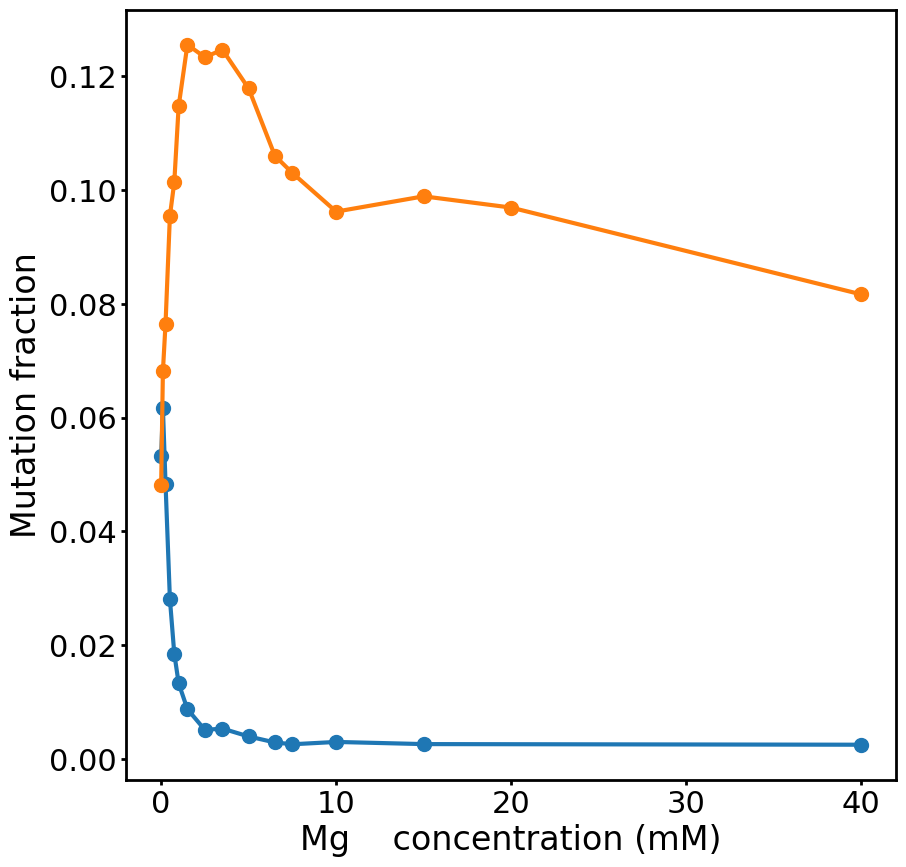

In [19]:
POS = 8
fig, ax = plt.subplots()
publication_line_w_markers(ax, df_sub['mg_conc'], df_sub['tlr'].apply(lambda x : x[POS-1]), label='Wild type')
publication_line_w_markers(ax, df_uucg['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), label='UUCG mutation')
publication_style_ax(ax)
ax.set_ylabel("Mutation fraction")
ax.set_xlabel("Mg    concentration (mM)")
ax.set_box_aspect(1)

### TLR A5

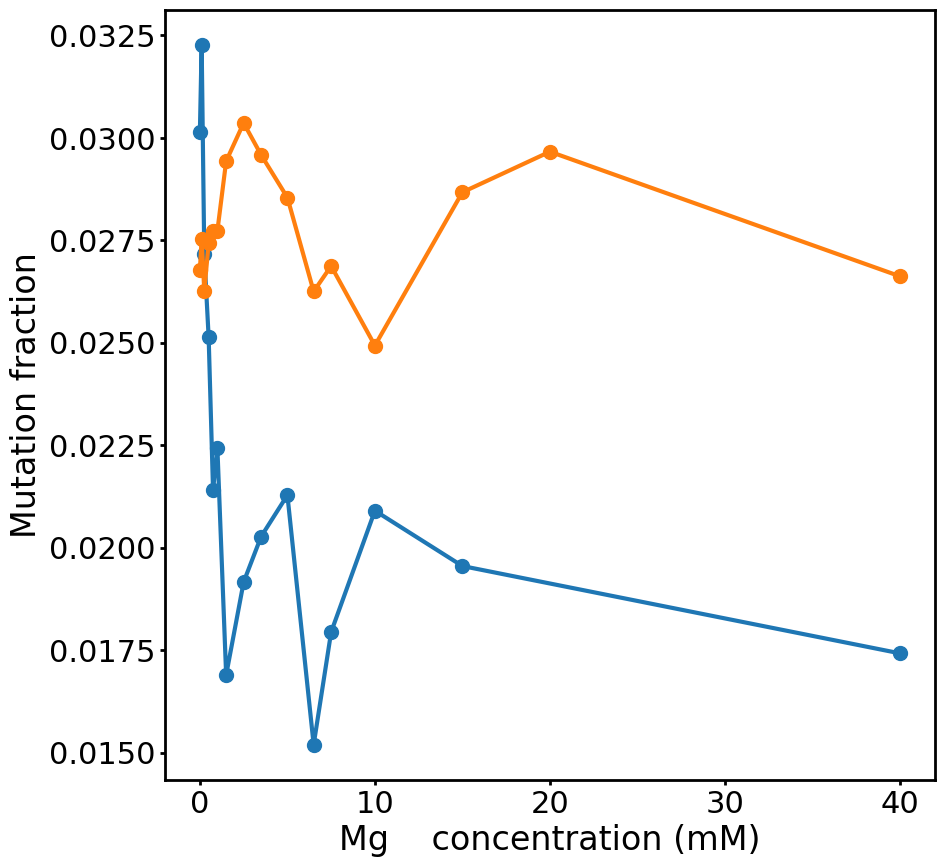

In [20]:
POS = 5
fig, ax = plt.subplots()
publication_line_w_markers(ax, df_sub['mg_conc'], df_sub['tlr'].apply(lambda x : x[POS-1]), label='Wild type')
publication_line_w_markers(ax, df_uucg['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), label='UUCG mutation')
publication_style_ax(ax)
ax.set_ylabel("Mutation fraction")
ax.set_xlabel("Mg    concentration (mM)")
ax.set_box_aspect(1)

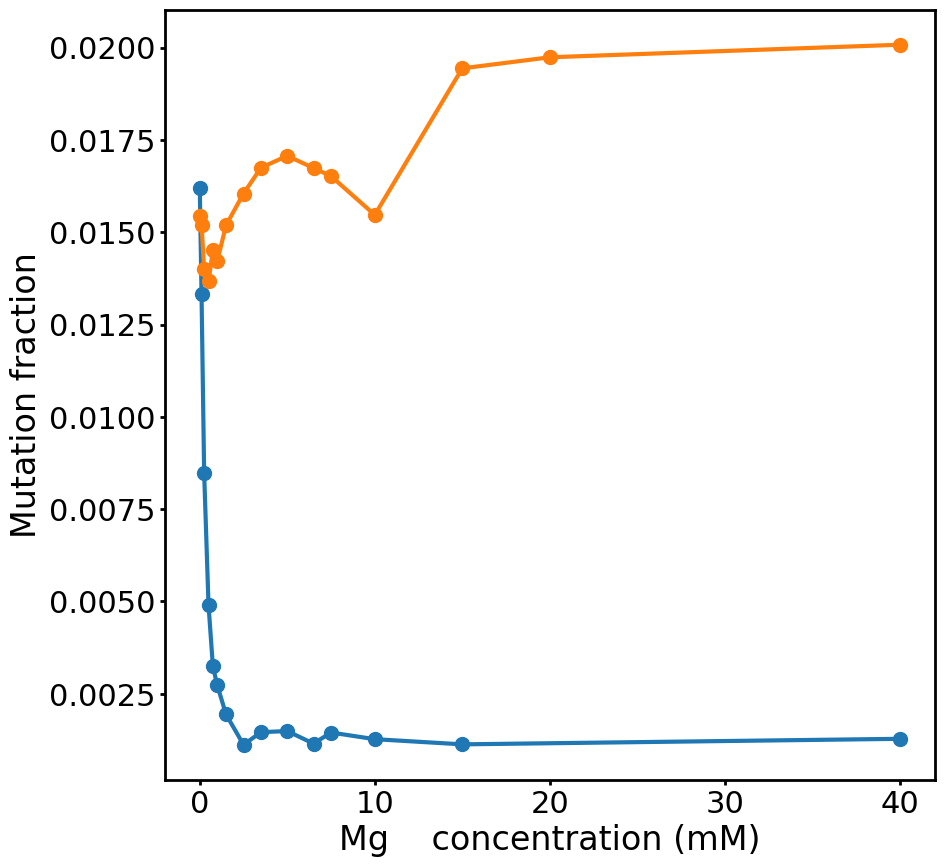

In [21]:
POS = 4
fig, ax = plt.subplots()
publication_line_w_markers(ax, df_sub['mg_conc'], df_sub['tlr'].apply(lambda x : x[POS-1]), label='Wild type')
publication_line_w_markers(ax, df_uucg['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), label='UUCG mutation')
publication_style_ax(ax)
ax.set_ylabel("Mutation fraction")
ax.set_xlabel("Mg    concentration (mM)")
ax.set_box_aspect(1)

## plot change in reactivity of receptor

In [22]:
def get_data_point(df, mg_conc, tlr_pos):
    df_sub = df[df['mg_conc'] == mg_conc]
    if len(df_sub) > 1:
        raise ValueError('More than one data point for given mg_conc')
    return df_sub.iloc[0]['tlr'][tlr_pos-1]

In [23]:
data = [
    ['A8', 'No Mg/ No GAAA', get_data_point(df_uucg, 0, 8) / get_data_point(df_uucg, 0, 8)],
    ['A8', 'Mg / No GAAA', get_data_point(df_uucg, 40, 8) / get_data_point(df_uucg, 0, 8)],
    ['A8', 'Mg / GAAA', get_data_point(df_sub, 40, 8) / get_data_point(df_uucg, 0, 8)],
    ['A5', 'No Mg/ No GAAA', get_data_point(df_uucg, 0, 5) / get_data_point(df_uucg, 0, 5)],
    ['A5', 'Mg / No GAAA', get_data_point(df_uucg, 40, 5) / get_data_point(df_uucg, 0, 5)],
    ['A5', 'Mg / GAAA', get_data_point(df_sub, 40, 5) / get_data_point(df_uucg, 0, 5)],
    ['A4', 'No Mg/ No GAAA', get_data_point(df_uucg, 0, 4) / get_data_point(df_uucg, 0, 4) ],
    ['A4', 'Mg / No GAAA', get_data_point(df_uucg, 40, 4) / get_data_point(df_uucg, 0, 4)],
    ['A4', 'Mg / GAAA', get_data_point(df_sub, 40, 4) / get_data_point(df_uucg, 0, 4) ],
]

In [24]:
df_mg_norm = pd.DataFrame(data, columns=['nuc', 'condition', 'data'])

In [25]:
data = [
    ['A8', '-Mg/-GAAA', get_data_point(df_uucg, 0, 8)],
    ['A8', '+Mg/-GAAA', get_data_point(df_uucg, 40, 8)],
    ['A8', '+Mg/+GAAA', get_data_point(df_sub, 40, 8)],
    ['A5', '-Mg/-GAAA', get_data_point(df_uucg, 0, 5)],
    ['A5', '+Mg/-GAAA', get_data_point(df_uucg, 40, 5)],
    ['A5', '+Mg/+GAAA', get_data_point(df_sub, 40, 5)],
    ['A4', '-Mg/-GAAA', get_data_point(df_uucg, 0, 4) ],
    ['A4', '+Mg/-GAAA', get_data_point(df_uucg, 40, 4)],
    ['A4', '+Mg/+GAAA', get_data_point(df_sub, 40, 4) ],
]

In [26]:
df_mg = pd.DataFrame(data, columns=['nuc', 'condition', 'data'])

In [27]:
df_mg

,nuc,condition,data
0,A8,-Mg/-GAAA,0.04813
1,A8,+Mg/-GAAA,0.08166
2,A8,+Mg/+GAAA,0.00252
3,A5,-Mg/-GAAA,0.02678
4,A5,+Mg/-GAAA,0.02662
5,A5,+Mg/+GAAA,0.01742
6,A4,-Mg/-GAAA,0.01543
7,A4,+Mg/-GAAA,0.02008
8,A4,+Mg/+GAAA,0.00128


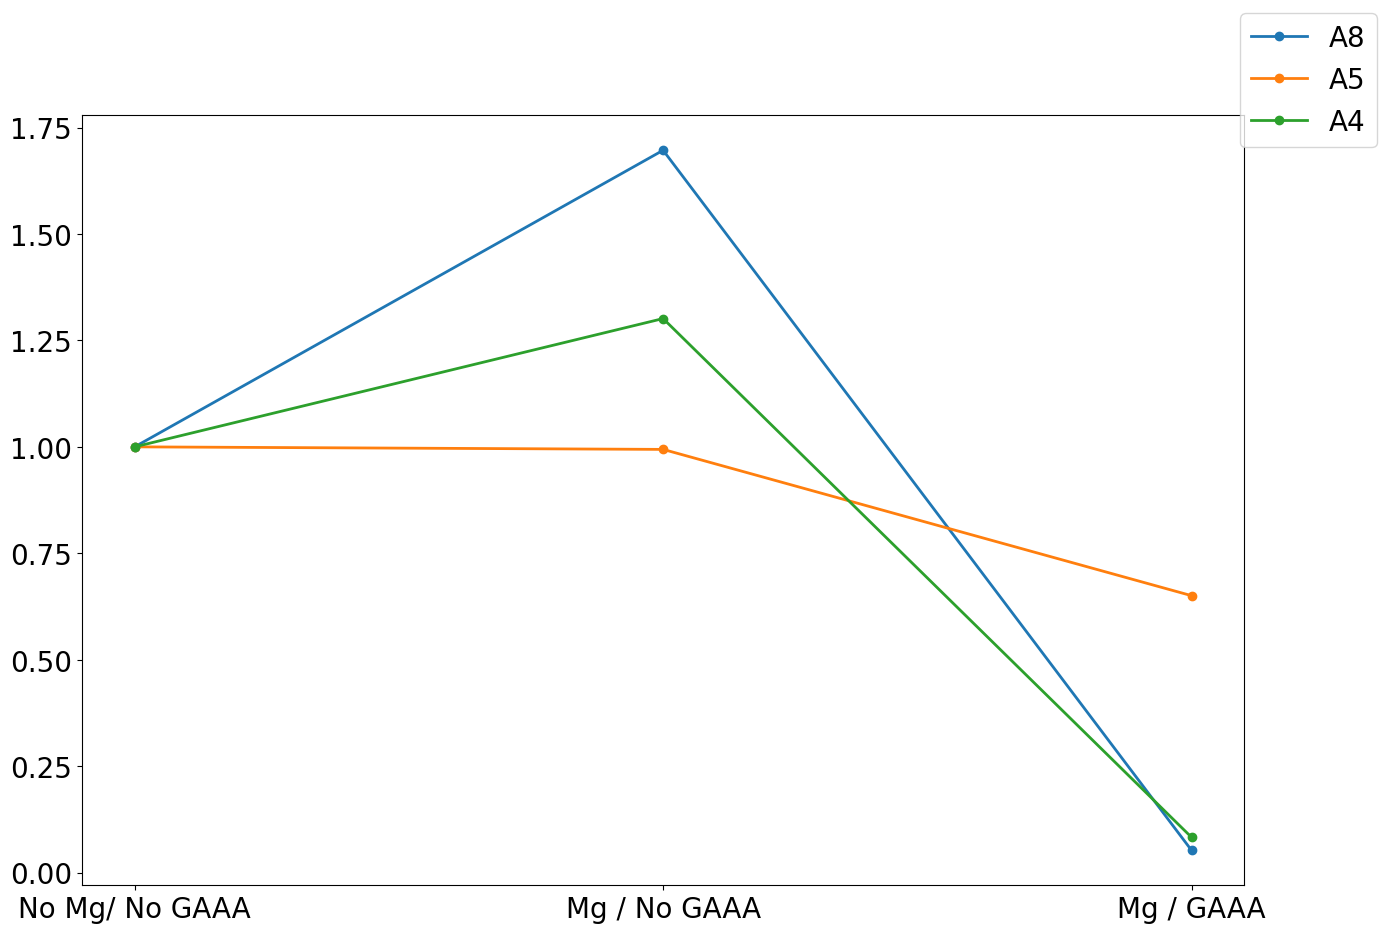

In [28]:
fig, ax = plt.subplots()
res = df_mg_norm['nuc'].unique() 
for r in res:
    df_sub_mg = df_mg_norm[df_mg_norm['nuc'] == r]
    ax.plot(df_sub_mg['condition'], df_sub_mg['data'], label=r, lw=2, marker='o')
fig.legend()

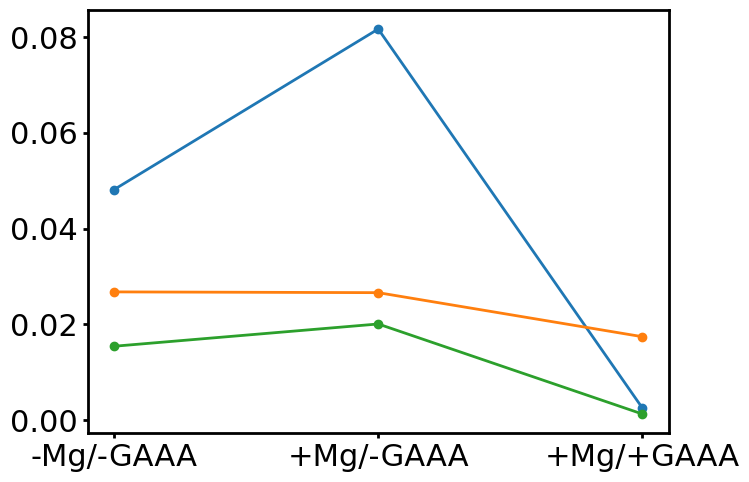

In [29]:
fig, ax = plt.subplots(figsize=(7.5, 5.5))
res = df_mg['nuc'].unique() 
for r in res:
    df_sub_mg = df_mg[df_mg['nuc'] == r]
    ax.plot(df_sub_mg['condition'], df_sub_mg['data'], label=r, lw=2, marker='o')
publication_style_ax(ax)
#labels = ['-Mg/-GAAA', '-Mg/-GAAA', '-Mg/-GAAA']
#ax.set_xticklabels(labels, rotation=-45)


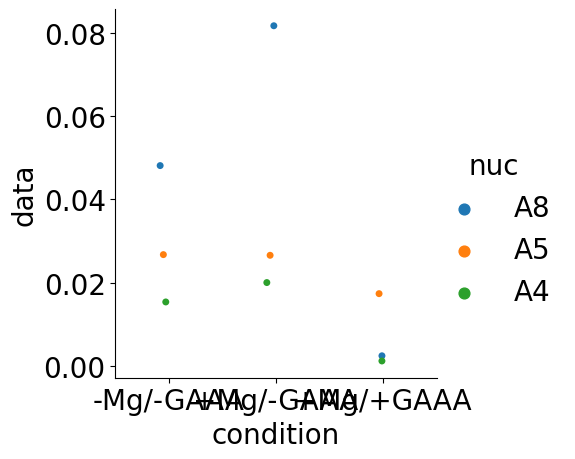

In [30]:
ax = sns.catplot(x="condition", y="data", hue="nuc", data=df_mg)

In [31]:
data = [
    ['A8', 'No Mg/ No GAAA', 0.533],
    ['A8', 'Mg / No GAAA', 8.07],
    ['A8', 'Mg / GAAA', 0],
    ['A5', 'No Mg/ No GAAA', 1.78],
    ['A5', 'Mg / No GAAA', 1.34],
    ['A5', 'Mg / GAAA', 1.34],
    ['A4', 'No Mg/ No GAAA', 4.59 ],
    ['A4', 'Mg / No GAAA', 0.22],
    ['A4', 'Mg / GAAA', 0.22 ],

]

In [32]:
df_sasa = pd.DataFrame(data, columns=['nuc', 'condition', 'data'])

<ipython-input-36-d86ac82c2db9>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


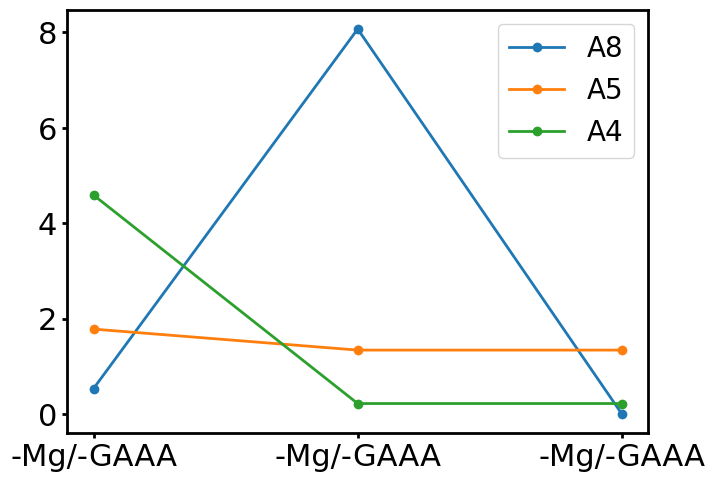

In [36]:
fig, ax = plt.subplots(figsize=(7.5, 5.5))
res = df_mg['nuc'].unique() 
for r in res:
    df_sub_sasa = df_sasa[df_sasa['nuc'] == r]
    ax.plot(df_sub_sasa['condition'], df_sub_sasa['data'], label=r, lw=2, marker='o')
labels = ['-Mg/-GAAA', '-Mg/-GAAA', '-Mg/-GAAA']
ax.legend()
ax.set_xticklabels(labels)
publication_style_ax(ax)